# Task Description

В цехе находятся 2 станка.
В цех поступают детали в среднем через каждые 35 минут (здесь и далее подразумевается, что все времена распределены экспоненциально).
Обработка детали производится на одном из двух станков.
Первый обрабатывает деталь в среднем за 30 минут, при этом отвергает 4% деталей, считая их бракованными.
Второй обрабатывает деталь в среднем за 50 минут, при этом отвергает 8% деталей, считая их бракованными.
Детали, которые были отвергнуты на обоих станках, считаются отходами и не обслуживаются цехом.
Детали, которые были отвергнуты на любом станке передаются на повторную обработку на второй станок.
Моделирование проводится на 500 деталей.

### Imports 

In [1]:
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline

### Variables Declaration

In [2]:
# constants
amount_of_arrivals = 500
decline_first_machine = 20
decline_second_machine = 100

first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

# simulation variables
x = list(range(amount_of_arrivals))
current_time = 0
first_machine_time = 0
second_machine_time = 0

# collections of elements
customers_time = [] # arrive times distributed exponentially will be stored here
customers_status = [] # str variable for each 

### Generation of Exponentialy distributed time-arrivals

In [3]:
    # custom function
    #-35*math.log(random.random(), math.e);
    
    # exponential distibution with lambda = 
    #customers_arrive_time.append(random.expovariate(0.5))
    
    # normal distribution N(0,1)
    #customers_arrive_time.append(random.gammavariate(0.1,1))

In [4]:
def get_random_exp_value():
    return round(random.expovariate(35 / 10000))

In [5]:
def get_service_time_value(val):
    return round(random.expovariate(val / 10000))

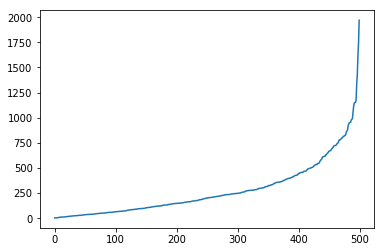

In [6]:
customers_time = []

for i in x:
    customers_time.append(get_random_exp_value())
    
customers_time.sort()
plt.plot(x, customers_time)

#print(customers_time)

# Допустим все окей. График выглядит правдоподобно для экспоненциального распределения (?)

### Setup for other variables states

In [15]:
for i in x:
    customers_status.append('arrive')
    
#customers_status

# Functions Implementation

In [8]:
# choose machine
def number_of_machine_to_work_on():
    rnd = random.random()
    if (rnd < 0.5):
        return 1
    else:
        return 2

In [9]:
# returns true if machine doesn't decline item
def work_with_item(percentage_for_decline):
    r = random.random()
    
    if (r < percentage_for_decline / 100):
        return 0
    return 1

In [10]:
def first_machine():
    global first_success_amount
    global first_reject_amount
    global first_machine_time
    global current_time
    
    if (work_with_item(decline_first_machine)):
        first_success_amount += 1
        
        if (first_machine_time <= current_time):
            # work is done for this item
            first_machine_time = current_time + get_service_time_value(30)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            first_machine_time += get_service_time_value(30)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
    else:
        first_reject_amount += 1
        customers_time.append(first_machine_time)
        customers_status.append('repeat')

In [11]:
def second_machine(isRepeating):
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global current_time
    
    if (work_with_item(decline_second_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(50)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(50)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

# Simulation

In [12]:
i = 0 # current arrival that is supported

for i in range(len(customers_time)):
    current_time = customers_time[i]
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            second_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        second_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'repeat'):
        garbage_amount += 1    

### Results

In [13]:
print('Rejects: ', first_reject_amount + second_reject_amount)
print('Successes: ', first_success_amount + second_success_amount)
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

Rejects:  308
Successes:  192
Garbage items:  0
Finishes:  0
Repeats:  0
